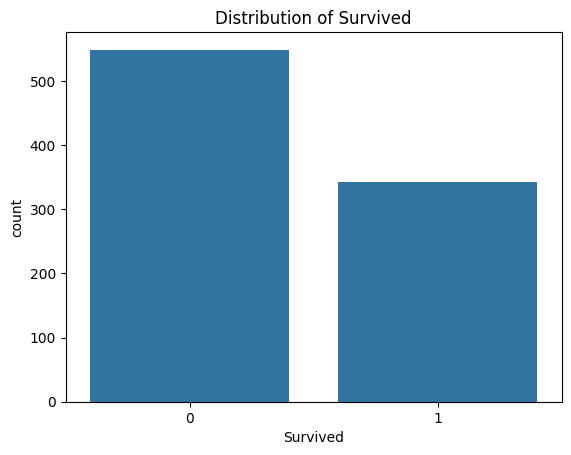

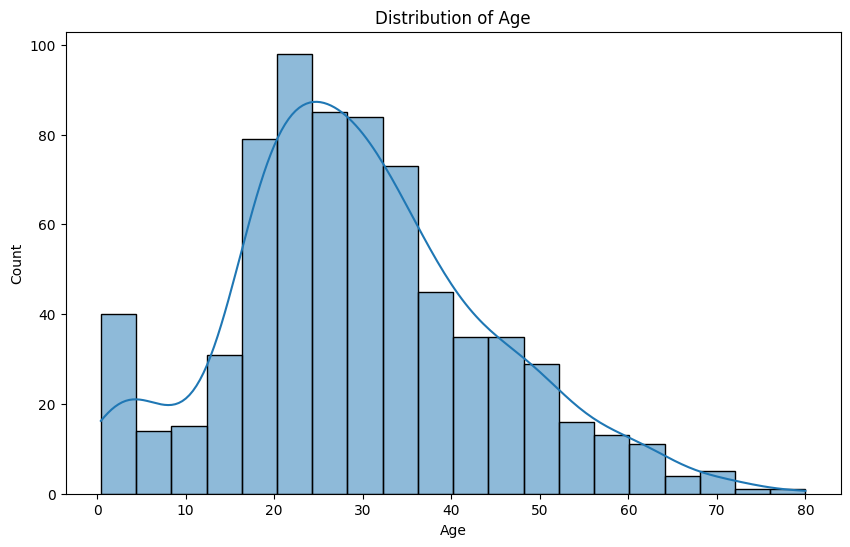

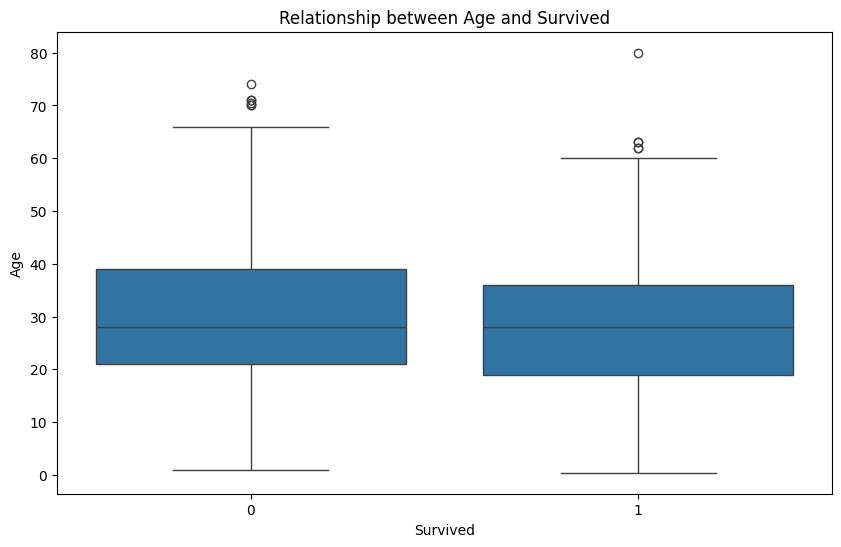

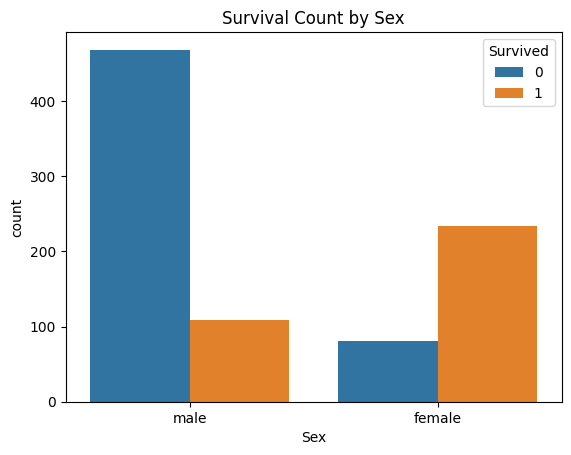

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 442
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

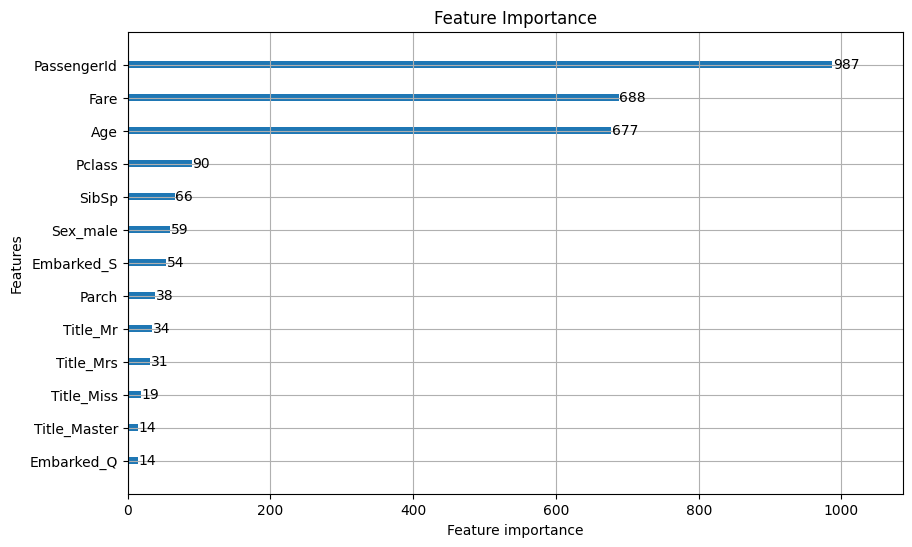

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data using a correct file path format
train_df = pd.read_csv(r"c:\Users\HP PROBOOK\Downloads\XGBM & LGBM\XGBM & LGBM\Titanic_train.csv")
test_df = pd.read_csv(r"c:\Users\HP PROBOOK\Downloads\XGBM & LGBM\XGBM & LGBM\Titanic_test.csv")

# Exploratory Data Analysis (EDA)
# Distribution of the target variable
sns.countplot(x='Survived', data=train_df)
plt.title('Distribution of Survived')
plt.show()

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Relationship between Age and Survived
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title('Relationship between Age and Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Relationship between Sex and Survived
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival Count by Sex')
plt.show()

# Feature Engineering
train_df['Title'] = train_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Fill missing values
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

# One-Hot Encoding for categorical columns 'Embarked', 'Sex', 'Title'
categorical_features = ['Embarked', 'Sex', 'Title']
onehot_encoder = OneHotEncoder(drop='first')  # Reduces dimensionality by dropping the first category
encoded_features = onehot_encoder.fit_transform(train_df[categorical_features])
encoded_features_df = pd.DataFrame(encoded_features.toarray(), columns=onehot_encoder.get_feature_names_out())

# Aligning indices after one-hot encoding
encoded_features_df.index = train_df.index

# Concatenating encoded features back to the original DataFrame
train_df_encoded = pd.concat([train_df, encoded_features_df], axis=1)

# Drop columns that will not be used in model training
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Title', 'Survived']
X = train_df_encoded.drop(columns=columns_to_drop, axis=1)
y = train_df_encoded['Survived']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_val)

# Evaluate model performance
accuracy = accuracy_score(y_val, lgb_pred)
print(f"Accuracy: {accuracy}")

# Visualization of model performance
lgb.plot_importance(lgb_model, figsize=(10, 6))
plt.title('Feature Importance')
plt.show()
